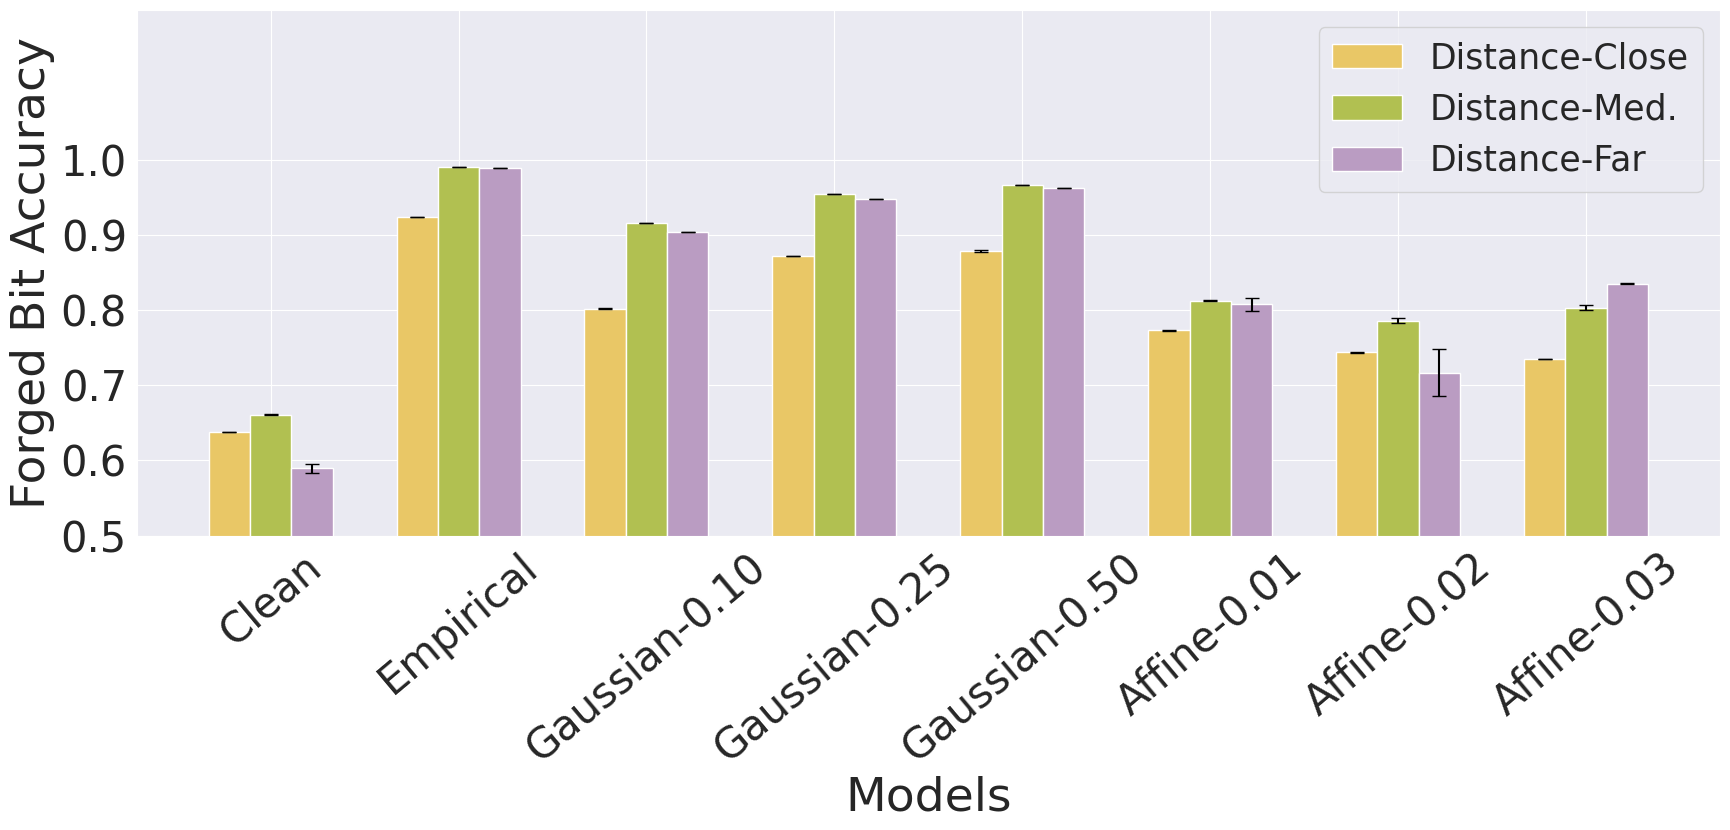

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions import name_dict
import seaborn as sns
sns.set_style('darkgrid')

def read_csv_data(file_paths):

    model_names = []
    acc_data = []
    std_data = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        if not model_names:
            model_names = df['model'].tolist()
        acc_data.append(df['u_bit_acc'].tolist())
        std_data.append(df['std_bit_acc'].tolist())

    
    return model_names, acc_data,std_data
labels = ["Distance-Close", "Distance-Med.", "Distance-Far"]
colors = [(233/255, 199/255, 102/255), (177/255, 192/255, 81/255), (186/255, 156/255, 194/255)]
def plot_acc(model_names, acc_data,std_data):

    n_models = len(model_names)
    n_tables = len(acc_data)
    
    # Define the position of the bars
    x = np.arange(n_models)
    width = 0.22  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18, 9))
    
    for i in range(n_tables):
        ax.bar(x + i * width, acc_data[i], width, yerr=std_data[i], label=labels[i], capsize=5,color=colors[i])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Models',fontsize=34)
    ax.set_ylabel('Forged Bit Accuracy',fontsize=34)
    plt.ylim(0.5, 1.2)
    plt.yticks(np.arange(0.5,1.01,0.1),fontsize=30)

    # ax.set_title('Model Accuracy with Standard Deviation')
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_names)
    ax.legend(fontsize=25)
    
    plt.xticks(rotation=40,fontsize=30)
    plt.tight_layout()
    plt.savefig(f"../pic/forge/forgeacc_{data_choice}_{model_choice}_alpha{alpha}.pdf", bbox_inches='tight')
    plt.show()


data_choice = "COCO"
model_choice = "stega"
alpha = 1
# File paths to the three CSV files
file_paths = [f'../forged_results/text_distance/{data_choice}_{model_choice}_low_4__alpha{alpha}.csv', f'../forged_results/text_distance/{data_choice}_{model_choice}_mid_4__alpha{alpha}.csv', f'../forged_results/text_distance/{data_choice}_{model_choice}_high_4__alpha{alpha}.csv']

# Read the data from CSV files
model_names, acc_data, std_data = read_csv_data(file_paths)
model_names = [name_dict[m] for m in model_names]

# Plot the accuracy with standard deviation
plot_acc(model_names, acc_data, std_data)


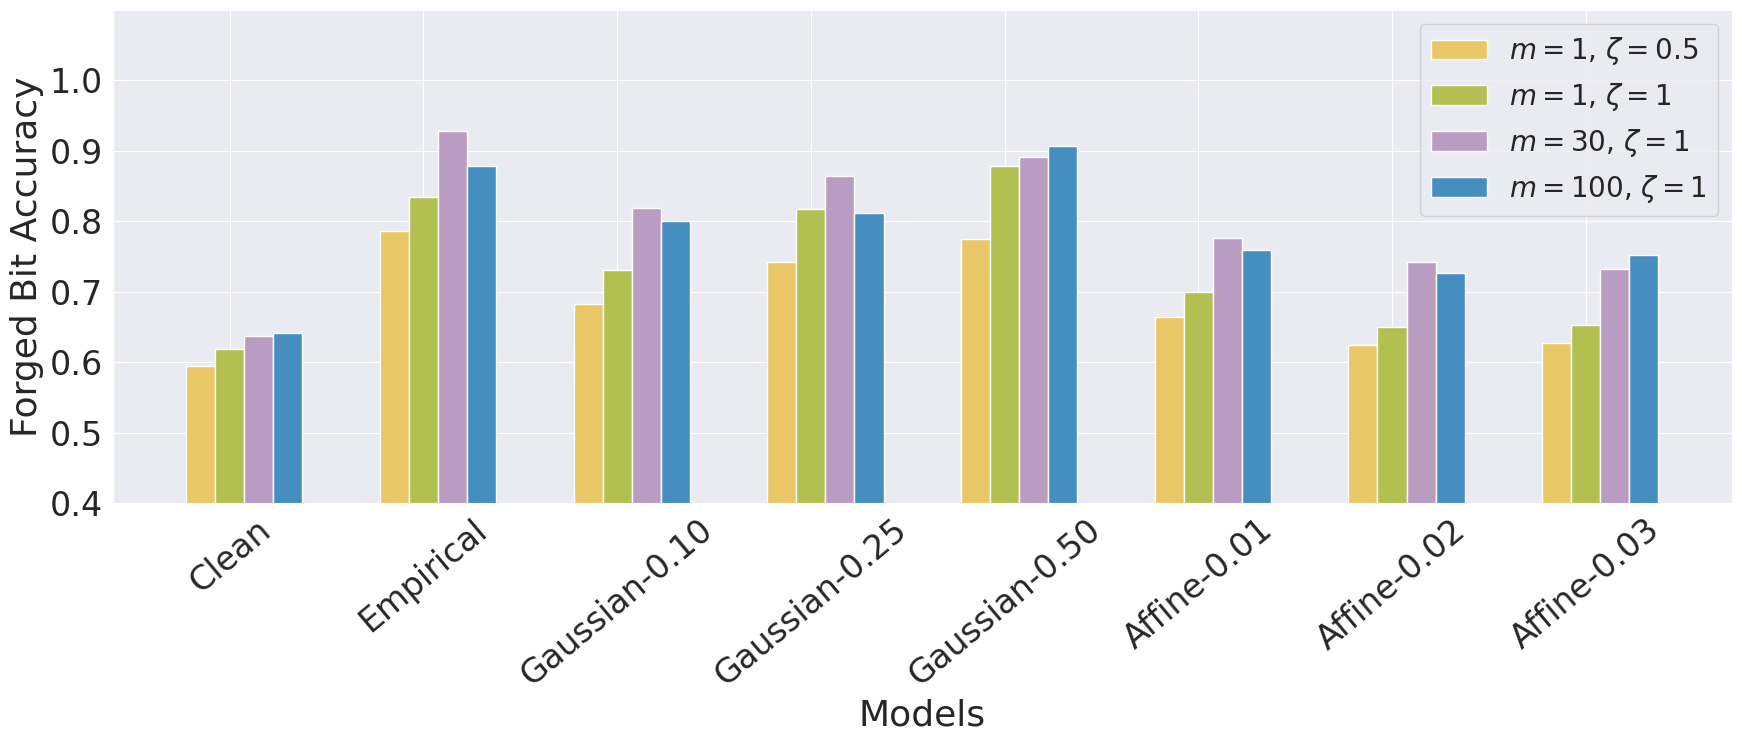

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions import name_dict
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 26

def read_csv_data(file_paths):

    model_names = []
    acc_data = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        if not model_names:
            model_names = df['model'].tolist()
        acc_data.append(df['bit_acc'].tolist())

    
    return model_names, acc_data
labels = ["$m=1$, $\zeta=0.5$ ", "$m=1$, $\zeta=1$ ", "$m=30$, $\zeta=1$ ","$m=100$, $\zeta=1$" ]
colors = [(233/255, 199/255, 102/255), (177/255, 192/255, 81/255), (186/255, 156/255, 194/255),(71/255,142/255,192/255)]
def plot_acc(model_names, acc_data):

    n_models = len(model_names)
    n_tables = len(acc_data)
    
    # Define the position of the bars
    x = np.arange(n_models)
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    for i in range(n_tables):
        ax.bar(x + i * width, acc_data[i], width, label=labels[i], capsize=5,color=colors[i])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Models')
    ax.set_ylabel('Forged Bit Accuracy')
    plt.ylim(0.4, 1.1)
    plt.yticks(np.arange(0.4,1.01,0.1),fontsize=24)

    # ax.set_title('Model Accuracy with Standard Deviation')
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_names)
    ax.legend(fontsize=20)
    
    plt.xticks(rotation=40,fontsize=24)
    plt.tight_layout()
    plt.savefig(f"../pic/forge/forgeacc_{data_choice}_{model_choice}_ablation.pdf", bbox_inches='tight')
    plt.show()


data_choice = "COCO"
model_choice = "stega"

# File paths to the three CSV files
file_paths = [f'../forged_results/parameters/{data_choice}_{model_choice}_low_1__alpha0.5_1.csv', f'../forged_results/parameters/COCO_stega_low_1__alpha1_1.csv', 
              f'../forged_results/parameters/COCO_stega_low_4__alpha1_30.csv',f'../forged_results/parameters/COCO_stega_low_4__alpha1_100.csv']

# Read the data from CSV files
model_names, acc_data= read_csv_data(file_paths)
model_names = [name_dict[m] for m in model_names]

# Plot the accuracy with standard deviation
plot_acc(model_names, acc_data)
